# Linear Regression
Ordinary linear regression (OLS) assumes there is a linear relationship between inputs and output:
$$\hat{y_i} = w^T x_i + b + \epsilon_i,$$
where $x_i \in \mathbb{R}^d$ is the feature vector, and $\hat{y_i}$ is the expected outcome of the prediction.

For OLS, we assume data is:
- **Zero mean:** $E[\epsilon_i] = 0.$
- **Constant variance:** $Var[\epsilon_i] = \sigma^2.$
- **Uncorrelated:** $Cov[\epsilon_i, \epsilon_j] = \sigma^2 \delta_{i j}.$

Those are strong assumptions. 

In [8]:
from pathlib import Path
import sys

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from models.linear_models import LinearRegression as LRImplemented
from models.linear_models import RidgeLinearRegression as RLRImplemented
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LRSample
from sklearn.linear_model import Ridge as RLRSample
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub

In [9]:
csv_path = project_root / "data" / "Advertising.csv"
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
target_col = "Sales"
X = df.drop([target_col, "Unnamed: 0"], axis=1)
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"\nFeature columns: {X.columns.tolist()}")

Features shape: (200, 3)
Target shape: (200,)
Target distribution:
Sales
9.7     5
12.9    4
15.9    4
11.7    4
11.8    3
       ..
17.6    1
6.7     1
9.9     1
5.9     1
25.5    1
Name: count, Length: 121, dtype: int64

Feature columns: ['TV', 'Radio', 'Newspaper']


Training set size: 160
Test set size: 40
Features scaled successfully
Model sample trained successfully!
Model coefficients shape: (3,)
model params: [3.76419618 2.79230665 0.05597551]
Model intercept: 14.1000
Epoch   10 | train_loss=5.420342
Epoch   20 | train_loss=2.753483
Epoch   30 | train_loss=2.706948
Epoch   40 | train_loss=2.705244
Epoch   50 | train_loss=2.705138
Epoch   60 | train_loss=2.705130
Epoch   70 | train_loss=2.705129
Epoch   80 | train_loss=2.705129
Epoch   90 | train_loss=2.705129
Epoch  100 | train_loss=2.705129
Epoch  110 | train_loss=2.705129
Epoch  120 | train_loss=2.705129
Epoch  130 | train_loss=2.705129
Epoch  140 | train_loss=2.705129
Epoch  150 | train_loss=2.705129
Epoch  160 | train_loss=2.705129
Epoch  170 | train_loss=2.705129
Epoch  180 | train_loss=2.705129
Epoch  190 | train_loss=2.705129
Epoch  200 | train_loss=2.705129
Model sample trained successfully!
Model coefficients shape: (3,)
model params: [3.76419618 2.79230665 0.05597551]
Model intercept

Text(0, 0.5, 'loss (MSE)')

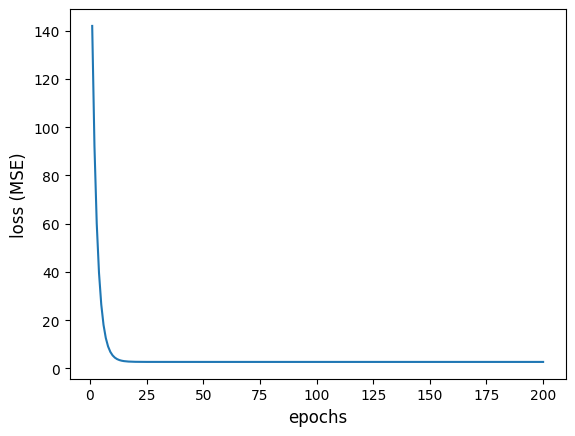

In [11]:
def split_data_and_normalize(X, y):
    # Note: stratify is only for classification, not regression
    # For regression problems (continuous target), we don't use stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


X_train_scaled, X_test_scaled, y_train, y_test = split_data_and_normalize(X, y)
print("Features scaled successfully")

# Train the linear regression model
model_sample = LRSample()
model_sample.fit(X_train_scaled, y_train)

print("Model sample trained successfully!")
print(f"Model coefficients shape: {model_sample.coef_.shape}")
print(f"model params: {model_sample.coef_}")
print(f"Model intercept: {model_sample.intercept_:.4f}")
print("=" * 70)

model_impl = LRImplemented()
loss_history = model_impl.fit(X_train_scaled, y_train)
print("Model sample trained successfully!")
print(f"Model coefficients shape: {model_impl.coef_.shape}")
print(f"model params: {model_impl.coef_}")
print(f"Model intercept: {model_impl.intercept_:.4f}")

epochs = np.arange(1, model_impl.epochs + 1)
plt.plot(epochs, loss_history)
plt.xlabel("epochs", fontsize=12)
plt.ylabel("loss (MSE)", fontsize=12)

In [12]:
rlr_model_sample = RLRSample()
rlr_model_sample.fit(X_train_scaled, y_train)
print("Model sample trained successfully!")
print(f"Model coefficients shape: {rlr_model_sample.coef_.shape}")
print(f"model params: {rlr_model_sample.coef_}")
print(f"Model intercept: {rlr_model_sample.intercept_:.4f}")
print("=" * 70)

rlr_model_impl = RLRImplemented()
rlr_model_impl.fit(X_train_scaled, y_train)
print("Model sample trained successfully!")
print(f"Model coefficients shape: {rlr_model_impl.coef_.shape}")
print(f"model params: {rlr_model_impl.coef_}")
print(f"Model intercept: {rlr_model_impl.intercept_:.4f}")

Model sample trained successfully!
Model coefficients shape: (3,)
model params: [3.74169256 2.77331224 0.0633801 ]
Model intercept: 14.1000
Epoch   10 | train_loss=5.435329
Epoch   20 | train_loss=2.758365
Epoch   30 | train_loss=2.708841
Epoch   40 | train_loss=2.706369
Epoch   50 | train_loss=2.706062
Epoch   60 | train_loss=2.706002
Epoch   70 | train_loss=2.705987
Epoch   80 | train_loss=2.705983
Epoch   90 | train_loss=2.705982
Epoch  100 | train_loss=2.705982
Epoch  110 | train_loss=2.705982
Epoch  120 | train_loss=2.705982
Epoch  130 | train_loss=2.705982
Epoch  140 | train_loss=2.705982
Epoch  150 | train_loss=2.705982
Epoch  160 | train_loss=2.705982
Epoch  170 | train_loss=2.705982
Epoch  180 | train_loss=2.705982
Epoch  190 | train_loss=2.705982
Epoch  200 | train_loss=2.705982
Model sample trained successfully!
Model coefficients shape: (3,)
model params: [3.74169256 2.77331224 0.0633801 ]
Model intercept: 14.1000
